In [ ]:
import keras
import pandas as pd
import seaborn as sns
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data = data.iloc[:,:].values

In [ ]:
x = data[:,:4]
y = data[:,4]
y = pd.get_dummies(y).iloc[:,:].values
y.shape
x.shape

(150, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,shuffle=True, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Dense(40, input_dim=4, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(3,  activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=2)

Train on 135 samples, validate on 15 samples
Epoch 1/10
135/135 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7407 - val_loss: 0.4577 - val_accuracy: 0.8444
Epoch 2/10
135/135 [==============================] - 0s 733us/step - loss: 0.4106 - accuracy: 0.8296 - val_loss: 0.3886 - val_accuracy: 0.8444
Epoch 3/10
135/135 [==============================] - 0s 670us/step - loss: 0.3457 - accuracy: 0.8617 - val_loss: 0.3341 - val_accuracy: 0.8222
Epoch 4/10
135/135 [==============================] - 0s 686us/step - loss: 0.2915 - accuracy: 0.8494 - val_loss: 0.2981 - val_accuracy: 0.8889
Epoch 5/10
135/135 [==============================] - 0s 652us/step - loss: 0.2863 - accuracy: 0.8642 - val_loss: 0.2704 - val_accuracy: 0.8667
Epoch 6/10
135/135 [==============================] - 0s 703us/step - loss: 0.2290 - accuracy: 0.9383 - val_loss: 0.2187 - val_accuracy: 0.9111
Epoch 7/10
135/135 [==============================] - 0s 740us/step - loss: 0.2024 - accuracy

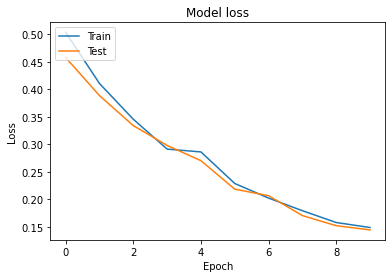

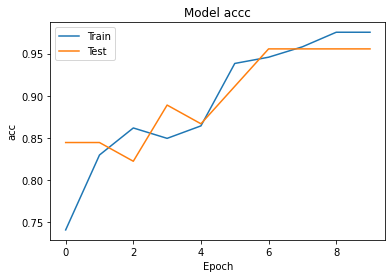

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()